# 3.2  Case Study 2: Language processing


## Project Gutenberg:-
### 1. Learn about Project Gutenberg, the oldest digital library of books
### 2. Get an overview of the language processing tasks we will accomplish in this case study
Note that because of file size limits, we had to split the Books dataset into two parts, one containing the books in English and French, and the other containing the books in German and Portuguese.

- Learn how to write your own function to count the number of times a unique word appears in a given string text. Learn about how to use the Counter tool from the collections module to accomplish the same task


In [1]:
from collections import Counter
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
text = "This is test text. We're keeping this text short to keep things manageble."

def count_words(text):
    """
    Count the number of times each word occurs in text (str). Return dictionary where keys are unique word and values are word count.
    """
    
    word_counts = {}
    for word in text.split(" "):
        # known word
        if word in word_counts:
            word_counts[word] += 1
        # unknown word
        else:
            word_counts[word] = 1
    return word_counts

In [3]:
count_words(text)

{'This': 1,
 'is': 1,
 'test': 1,
 'text.': 1,
 "We're": 1,
 'keeping': 1,
 'this': 1,
 'text': 1,
 'short': 1,
 'to': 1,
 'keep': 1,
 'things': 1,
 'manageble.': 1}

In [4]:
def count_words(text):
    """
    Count the number of times each word occurs in text (str). Return dictionary where keys are unique word and values are word count. Skip the panctuation
    """
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"']
    for ch in skips:
        text = text.replace(ch, "")
        
    word_counts = {}
    for word in text.split(" "):
        # known word
        if word in word_counts:
            word_counts[word] += 1
        # unknown word
        else:
            word_counts[word] = 1
    return word_counts

In [5]:
count_words(text)

{'this': 2,
 'is': 1,
 'test': 1,
 'text': 2,
 'were': 1,
 'keeping': 1,
 'short': 1,
 'to': 1,
 'keep': 1,
 'things': 1,
 'manageble': 1}

In [6]:
from collections import Counter

In [7]:
def count_words_fast(text):
    """
    Count the number of times each word occurs in text (str). Return dictionary where keys are unique word and values are word count. Skip the panctuation
    """
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"']
    for ch in skips:
        text = text.replace(ch, "")
        
    word_counts = Counter(text.split(" "))    
    return word_counts

In [8]:
count_words_fast(text)

Counter({'this': 2,
         'is': 1,
         'test': 1,
         'text': 2,
         'were': 1,
         'keeping': 1,
         'short': 1,
         'to': 1,
         'keep': 1,
         'things': 1,
         'manageble': 1})

In [9]:
count_words_fast(text) == count_words(text)

True

In [10]:
len(count_words("This comprehension check is to check for comprehension."))

6

In [11]:
def read_book(title_path):
        """Read a book and return it as a string"""
        
        with open(title_path, "r", encoding = "utf8") as current_file:
            text = current_file.read()
            text = text.replace("\n", "").replace("\r", "")
        return text

In [12]:
text = read_book("C:/Users/Eva/Books case study 2/English/shakespeare/Romeo and Juliet.txt")

len(text)

169275

In [13]:
ind = text.find("What's in a name?")

ind

42757

In [14]:
sample_text = text[ind : ind+1000]
sample_text

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consid

### Computing word frequency statistics

In [15]:
def word_stats(word_counts):
    """Return number of unique words and word frequencies"""
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

text = read_book("C:/Users/Eva/Books case study 2/English/shakespeare/Romeo and Juliet.txt")
word_counts = count_words(text)

(num_unique, counts) = word_stats(word_counts)
print(num_unique, sum(counts))

5118 40776


In [16]:
num_unique

5118

In [17]:
sum(counts)

40776

In [18]:
text = read_book("C:/Users/Eva/Books case study 2/German/shakespeare/Romeo und Julia.txt")
word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts)
print(num_unique, sum(counts))

7527 20311


## Reading Multiple Files

In [19]:
book_dir = "C:/Users/Eva/Books case study 2"
os.listdir(book_dir)

['English', 'French', 'German', 'Portuguese']

In [30]:
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))

C:/Users/Eva/Books case study 2/English/shakespeare/A Midsummer Night's Dream.txt
C:/Users/Eva/Books case study 2/English/shakespeare/Hamlet.txt
C:/Users/Eva/Books case study 2/English/shakespeare/Macbeth.txt
C:/Users/Eva/Books case study 2/English/shakespeare/Othello.txt
C:/Users/Eva/Books case study 2/English/shakespeare/Richard III.txt
C:/Users/Eva/Books case study 2/English/shakespeare/Romeo and Juliet.txt
C:/Users/Eva/Books case study 2/English/shakespeare/The Merchant of Venice.txt
C:/Users/Eva/Books case study 2/French/chevalier/L'enfer et le paradis de l'autre monde.txt
C:/Users/Eva/Books case study 2/French/chevalier/L'åle de sable.txt
C:/Users/Eva/Books case study 2/French/chevalier/La capitaine.txt
C:/Users/Eva/Books case study 2/French/chevalier/La fille des indiens rouges.txt
C:/Users/Eva/Books case study 2/French/chevalier/La fille du pirate.txt
C:/Users/Eva/Books case study 2/French/chevalier/Le chasseur noir.txt
C:/Users/Eva/Books case study 2/French/chevalier/Les derni

In [31]:
stats = pd.DataFrame(columns = ("Language" , "Author", "Title", "Length", "Unique"))
title_num = 1
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt",""), sum(counts), num_unique
            title_num += 1
            

C:/Users/Eva/Books case study 2/English/shakespeare/A Midsummer Night's Dream.txt
C:/Users/Eva/Books case study 2/English/shakespeare/Hamlet.txt
C:/Users/Eva/Books case study 2/English/shakespeare/Macbeth.txt
C:/Users/Eva/Books case study 2/English/shakespeare/Othello.txt
C:/Users/Eva/Books case study 2/English/shakespeare/Richard III.txt
C:/Users/Eva/Books case study 2/English/shakespeare/Romeo and Juliet.txt
C:/Users/Eva/Books case study 2/English/shakespeare/The Merchant of Venice.txt
C:/Users/Eva/Books case study 2/French/chevalier/L'enfer et le paradis de l'autre monde.txt
C:/Users/Eva/Books case study 2/French/chevalier/L'åle de sable.txt
C:/Users/Eva/Books case study 2/French/chevalier/La capitaine.txt
C:/Users/Eva/Books case study 2/French/chevalier/La fille des indiens rouges.txt
C:/Users/Eva/Books case study 2/French/chevalier/La fille du pirate.txt
C:/Users/Eva/Books case study 2/French/chevalier/Le chasseur noir.txt
C:/Users/Eva/Books case study 2/French/chevalier/Les derni

In [32]:
stats

,Language,Author,Title,Length,Unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449
...,...,...,...,...,...
98,Portuguese,Queir¢s,O crime do padre Amaro,128630,29300
99,Portuguese,Queir¢s,O Mandarim,21440,7836
100,Portuguese,Queir¢s,O Primo Bazilio,107303,27644
101,Portuguese,Queir¢s,Os Maias,195771,40665


In [33]:
stats.Length

1       16103
2       28551
3       16874
4       26590
5       48315
        ...  
98     128630
99      21440
100    107303
101    195771
102     30567
Name: Length, Length: 102, dtype: object

In [34]:
stats.Unique

1       4345
2       6776
3       4780
4       5898
5       5449
       ...  
98     29300
99      7836
100    27644
101    40665
102     9700
Name: Unique, Length: 102, dtype: object

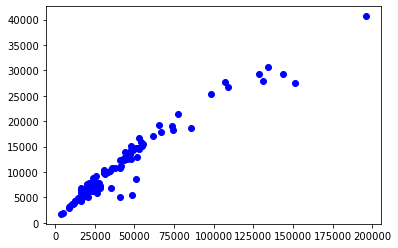

In [35]:
plt.plot(stats.Length, stats.Unique, "bo");

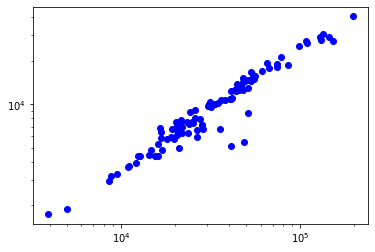

In [36]:
plt.loglog(stats.Length, stats.Unique, "bo");

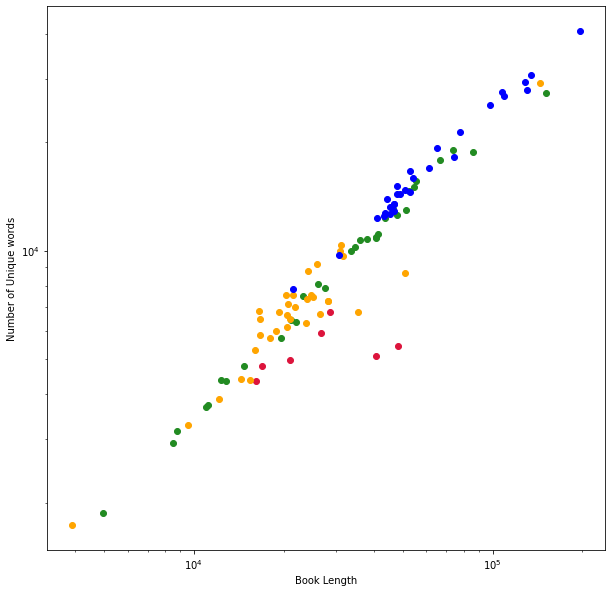

In [37]:
plt.figure(figsize = (10, 10))
subset = stats[stats.Language == "English"]
plt.loglog(subset.Length, subset.Unique, "o", label = "English", color = "crimson")

subset = stats[stats.Language == "French"]
plt.loglog(subset.Length, subset.Unique, "o", label = "French", color = "forestgreen")

subset = stats[stats.Language == "German"]
plt.loglog(subset.Length, subset.Unique, "o", label = "German", color = "orange")

subset = stats[stats.Language == "Portuguese"]
plt.loglog(subset.Length, subset.Unique, "o", label = "Portuguese", color = "blue")

plt.legend
plt.xlabel("Book Length")
plt.ylabel("Number of Unique words")
plt.savefig("lang_plot.pdf")

In [38]:
stats["Length"]

1       16103
2       28551
3       16874
4       26590
5       48315
        ...  
98     128630
99      21440
100    107303
101    195771
102     30567
Name: Length, Length: 102, dtype: object